# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### Connect to Google drive

In [1]:
# Import the necessary module from google.colab
from google.colab import drive
import os  # To check if the drive is already mounted

# Define the path where Google Drive is typically mounted
drive_path = '/content/drive'

# Check if the drive is already mounted
if not os.path.ismount(drive_path):
    # Mount Google Drive to the Colab runtime at the specified path
    print("Google Drive is not mounted. Mounting now...")
    drive.mount(drive_path)
else:
    print("Google Drive is already mounted.")

Google Drive is not mounted. Mounting now...
Mounted at /content/drive


### Install and Import necessary libraries and data

In [2]:
import subprocess
import sys
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

# Function to install and import libraries if not already installed
def install_and_import(package_name, pip_name=None):
    """
    Install a Python package if not already installed.

    Args:
        package_name (str): The name of the package to import.
        pip_name (str, optional): The name of the package in pip.
                                  Defaults to package_name if not provided.
    """
    try:
        __import__(package_name)
    except ImportError:
        print(f"Installing {pip_name or package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name or package_name])

# List of required libraries and their corresponding pip package names
libraries = {
    "io": None,  # Built-in module
    "re": None,  # Built-in module
    "IPython.display": "IPython",  # Display utilities
    "pandas": "pandas",  # Data manipulation
    "numpy": "numpy",  # Numerical operations
    "time": None,  # Built-in module
    "scipy.stats": "scipy",  # Statistical tests
    "matplotlib.pyplot": "matplotlib",  # Plotting library
    "seaborn": "seaborn",  # Statistical visualization
    "sklearn.model_selection": "scikit-learn",  # Train/test split, GridSearchCV
    "sklearn.tree": "scikit-learn",  # Decision Tree visualization
    "sklearn.ensemble": "scikit-learn",  # Random Forest
    "sklearn.cluster": "scikit-learn",  # DBSCAN clustering
    "sklearn.preprocessing": "scikit-learn",  # Feature scaling
    "sklearn.metrics": "scikit-learn",  # Evaluation metrics
    "statsmodels.api": "statsmodels",  # Statistical models
}

# Install missing libraries
for module, pip_package in libraries.items():
    if pip_package:
        install_and_import(module, pip_package)

# Import required libraries
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports for preprocessing, modeling, and evaluation
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, classification_report,recall_score,precision_score, accuracy_score,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)
from scipy.stats import chi2_contingency
# Confirmation message
print("All libraries installed and imported successfully.")

Installing statsmodels...
All libraries installed and imported successfully.


### Import data from Google drive

In [3]:
# Import data from CSV file located in Google Drive into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Applied_Data_Science/ADS_Elective_Project/ExtraaLearn.csv')

In [4]:
# Create a copy of the DataFrame to preserve the original data for reference or backup
xlern = df.copy()

## Data Overview

- Observations
- Sanity checks

In [6]:
xlern.shape
dim = xlern.shape[1]/xlern.shape[0]
print(f"The dataset dimensionality is {dim}.")

The dataset dimensionality is 0.0032523850823937554.


Due to low dimensionality most classification algorithms can be used for this dataset, subject to evaluation of other attributes of the dataset

In [7]:
def summarize_dataframe(sdf):
    """
    Summarizes the structure and content of a DataFrame, including column names,
    non-null counts, data types, unique values, missing values, and percentage of missing data.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.

    Returns:
    pd.DataFrame: A summary DataFrame containing details for each column.
    """
    summary_df = pd.DataFrame({
        'Column': sdf.columns,
        'Non-Null Count': sdf.notnull().sum(),
        'Data Type': sdf.dtypes,
        'Unique Values': sdf.nunique(),
        'Missing Values': sdf.isnull().sum(),
    }).reset_index(drop=True)
    return summary_df

# Use the summarize_dataframe function and display the summary
display(summarize_dataframe(xlern))

,Column,Non-Null Count,Data Type,Unique Values,Missing Values
0,ID,4612,object,4612,0
1,age,4612,int64,46,0
2,current_occupation,4612,object,3,0
3,first_interaction,4612,object,2,0
4,profile_completed,4612,object,3,0
5,website_visits,4612,int64,27,0
6,time_spent_on_website,4612,int64,1623,0
7,page_views_per_visit,4612,float64,2414,0
8,last_activity,4612,object,3,0
9,print_media_type1,4612,object,2,0


1. No missing values
2. ID is unique
3. Data types are in line with the actual data i.e. no date values as objects etc
4. Page views is a float since it is an average


In [8]:
# Iterate through each non numeric column and print its unique values
for column in xlern.select_dtypes(include=['object']):
    print(f"{column}: {xlern[column].unique()}")

ID: ['EXT001' 'EXT002' 'EXT003' ... 'EXT4610' 'EXT4611' 'EXT4612']
current_occupation: ['Unemployed' 'Professional' 'Student']
first_interaction: ['Website' 'Mobile App']
profile_completed: ['High' 'Medium' 'Low']
last_activity: ['Website Activity' 'Email Activity' 'Phone Activity']
print_media_type1: ['Yes' 'No']
print_media_type2: ['No' 'Yes']
digital_media: ['Yes' 'No']
educational_channels: ['No' 'Yes']
referral: ['No' 'Yes']


All categorical values look clean - no typos, unique values and consistent labelling.


In [9]:
# Check if the number of unique IDs is equal to the total number of records, drop the ID column if yes
if xlern['ID'].nunique() == xlern.shape[0]:
    # If true, drop the 'ID' column
    xlern.drop('ID', axis=1, inplace=True)
    print("ID column dropped as it contains only unique values and adds no value to analysis")
else:
    print("ID column not dropped as it might contain duplicate or other useful information.")

ID column dropped as it contains only unique values and adds no value to analysis


In [10]:
# Check for duplicates and handle them if found
num_duplicates = xlern.duplicated().sum()  # Count duplicates

if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    xlern.drop_duplicates(keep='first', inplace=True)  # Drop duplicates, keeping the first
    print(len(df) - len(xlern),"Duplicate rows dropped (keeping the first occurrence).")
    xlern.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates
else:
    print("No duplicate rows found.")

Number of duplicate rows: 14
14 Duplicate rows dropped (keeping the first occurrence).


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Let's first look at the numerical columns

In [11]:
# Get descriptive statistics of the Data, transposed for better readability
xlern.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4598.0,46.179208,13.160811,18.0,36.00,51.000,57.000,63.000
website_visits,4598.0,3.577642,2.826572,0.0,2.00,3.000,5.000,30.000
time_spent_on_website,4598.0,726.215746,743.884963,0.0,155.25,377.500,1341.750,2537.000
page_views_per_visit,4598.0,3.035339,1.964011,0.0,2.08,2.809,3.759,18.434
status,4598.0,0.299043,0.457889,0.0,0.00,0.000,1.000,1.000


Observations:
1. Time spent on websites, Web site visits and page views per visit, show a wide spread, indicating possible outliers

    Based on 25th and 75th percentile values
2. The age distribution skews towards older individuals, with most leads between 36 and 57 years
3. Most leads visit the website 2-5 times, but a few users are highly engaged
4. Most leads view around 2-4 pages per visit, with a small fraction engaging in deep browsing

In [12]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined with automatic bins and x-axis ticks.
    Ensures the x-axis starts at zero.

    data: DataFrame
    feature: Column in the DataFrame
    figsize: Size of the figure (default (12, 7))
    kde: Whether to show density curve (default True)
    bins: Number of bins or sequence of bin edges for histogram (default None)
    """
    # Create the subplots for boxplot and histogram
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,      # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot with the mean indicated
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # Calculate automatic bins if not provided
    if bins is None:
        q75, q25 = data[feature].quantile([0.75, 0.25])  # Interquartile range
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(data[feature]) ** (1 / 3))  # Freedman-Diaconis rule
        bins = max(1, int((data[feature].max() - data[feature].min()) / bin_width))  # Ensure at least 1 bin

    # Create the histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")

    # Add mean and median to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()

    # Ensure x-axis starts at 0
    ax_hist2.set_xlim(left=0)  # Set the minimum x-axis value to 0

    # Automatically adjust x-axis ticks
    x_min, x_max = ax_hist2.get_xlim()  # Get the updated limits of the x-axis
    ticks = np.linspace(x_min, x_max, num=10)  # Generate evenly spaced ticks
    ax_hist2.set_xticks(ticks)  # Set the new ticks

    plt.show()

In [13]:
# List of variables to plot
hist_box_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

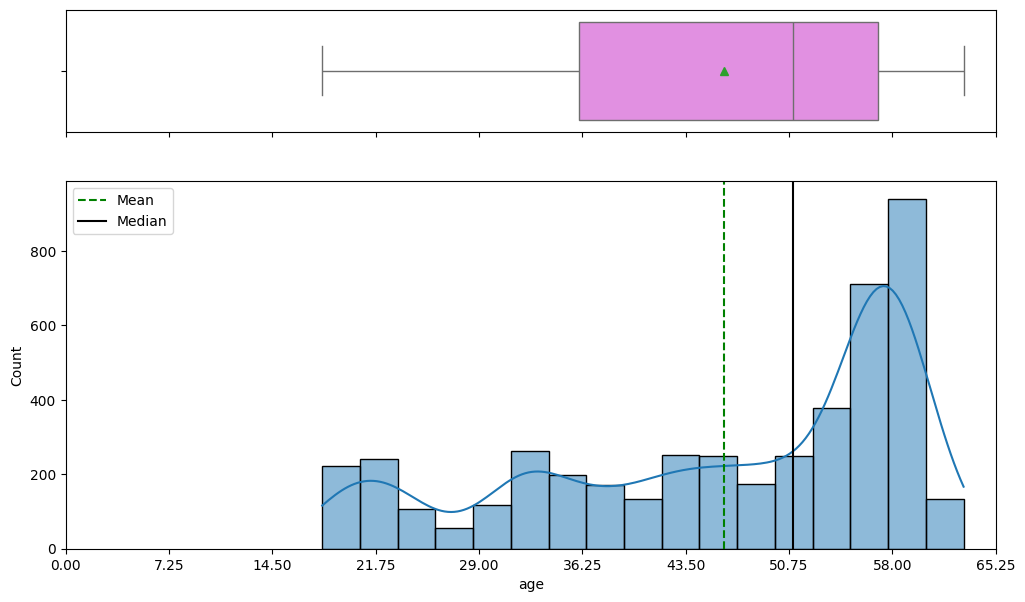

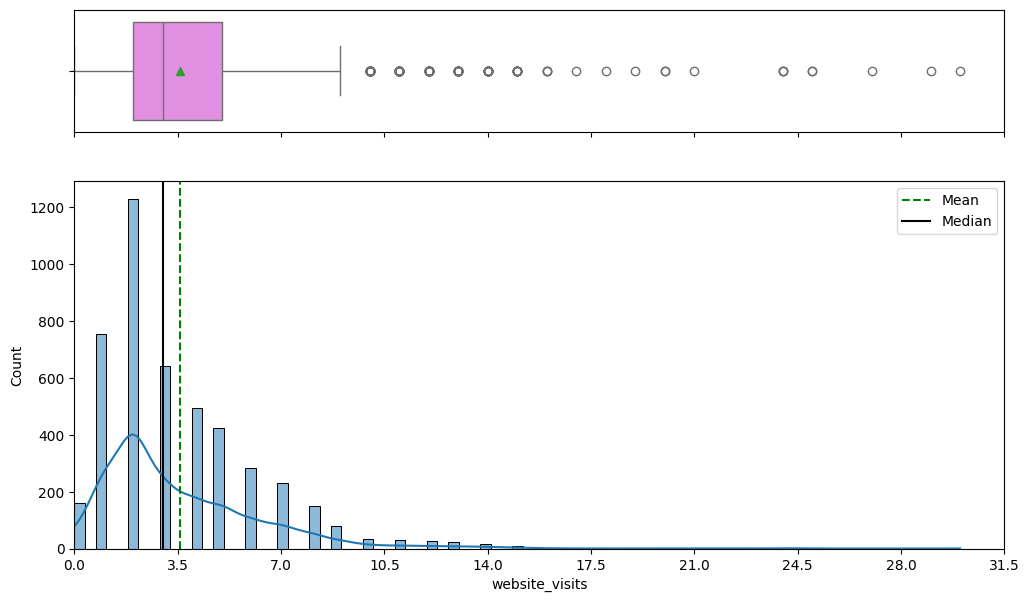

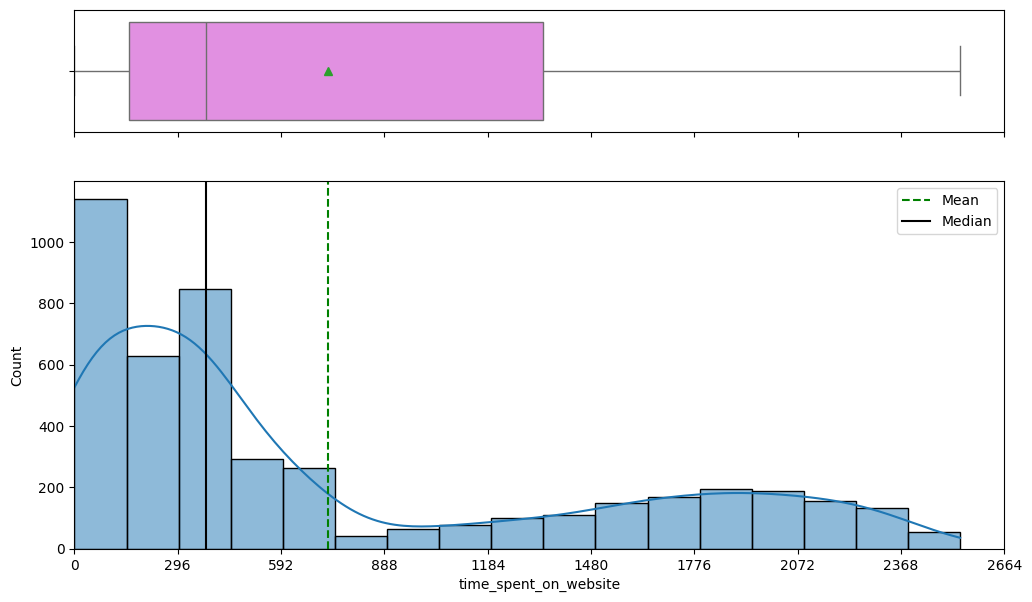

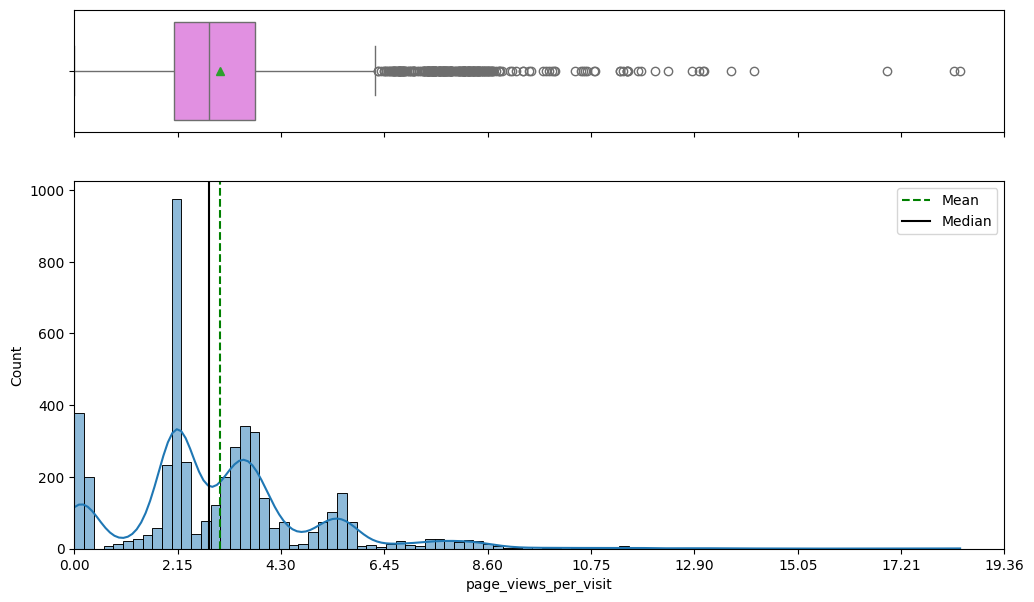

In [14]:
for features in hist_box_features:
    histogram_boxplot(xlern, features)

### Observations:
1. Age is left skewed with no outliers
2. No of website visits right skewed with several outliers and may benefit from capping
3. Time spent on web site is right skewed with no outliers
4. Page views per visit is also right skewed, multimodal, with a LOT of outliers and will benefit from capping

### Check if there is any correlation among the numeric features

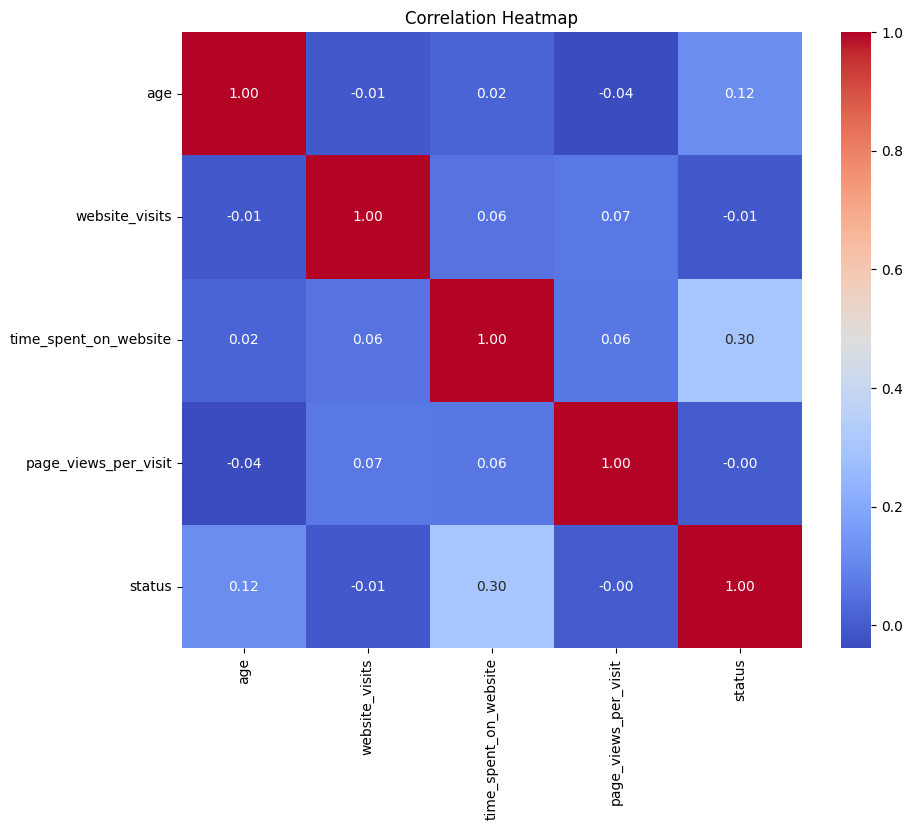

In [15]:
# Select the columns for correlation analysis
columns_for_correlation = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']

# Calculate the correlation matrix
correlation_matrix = xlern[columns_for_correlation].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Observation
1. There is vary little correlation between the numerical features
2. Status has some positive correlation with time spent on website

In [16]:
print(xlern['status'].value_counts(normalize=True))

status
0    0.700957
1    0.299043
Name: proportion, dtype: float64


### Now lets look at the categorical columns

In [17]:
# Create list of non numeric columns
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

In [18]:
# Print the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(xlern[column].value_counts(normalize=True))
    print("-" * 50)

current_occupation
Professional    0.567203
Unemployed      0.312310
Student         0.120487
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551544
Mobile App    0.448456
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490431
Medium    0.486298
Low       0.023271
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493475
Phone Activity      0.267290
Website Activity    0.239234
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892127
Yes    0.107873
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.949326
Yes    0.050674
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885385
Yes    0.114615
Name: proportion

Observations:
1. Engagement through individual print media, digital media, and educational channels is very low, suggesting a potential lack of outreach through the channels most frequented by leads. Alternatively, it may indicate that these channels have little to no impact on outcomes.
2. Additionally, the number of leads generated through referrals is also minimal.
3. Proportion of leads by occupation may indicate latent variables - cost of program and time committment for the program. These should be added to the dataset as these are easy to aquire

Both of the above together may indicate faulty data collection mechanism including but not limited to:
1. Search engine references are not recorded as outrech via digital media
2. Word of mouth reference is not recorded as referral

Further investigation is necessary to understand these patterns before incorporating these features into the modeling process.

Check for p values for each feature

In [19]:
# List to store results for each feature
results = []

# Loop through each categorical column in the dataset
for feature in cat_cols:
    # Create a contingency table for the current feature and the 'status' column
    contingency_table = pd.crosstab(xlern[feature], xlern['status'])

    # Perform the chi-squared test for independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append the feature name and p-value to the results list
    results.append({'Feature': feature, 'P-value': p})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Sort the results by P-value in descending order
sorted_results = results_df.sort_values(by='P-value', ascending=False)

# Print the sorted table
print(sorted_results)

                Feature        P-value
5     print_media_type2   4.787601e-01
6         digital_media   3.165972e-01
4     print_media_type1   2.907589e-01
7  educational_channels   2.439285e-01
8              referral   2.065689e-15
3         last_activity   1.672277e-18
0    current_occupation   7.947130e-30
2     profile_completed   1.149093e-67
1     first_interaction  1.291869e-146
9                status   0.000000e+00


Observation
1. As can be seen from p values, all of the out reach channels have no impact of the conversion rate and can be dropped from the dataset for prediction.
2. ExtraaLearn should undertake marketing research to identify the most effective outreach channels and prioratize resources towards these channels
3. Since referral is significant, incentives should be provided to alumni for referrals

### Let's check the relation between features and lead conversion status

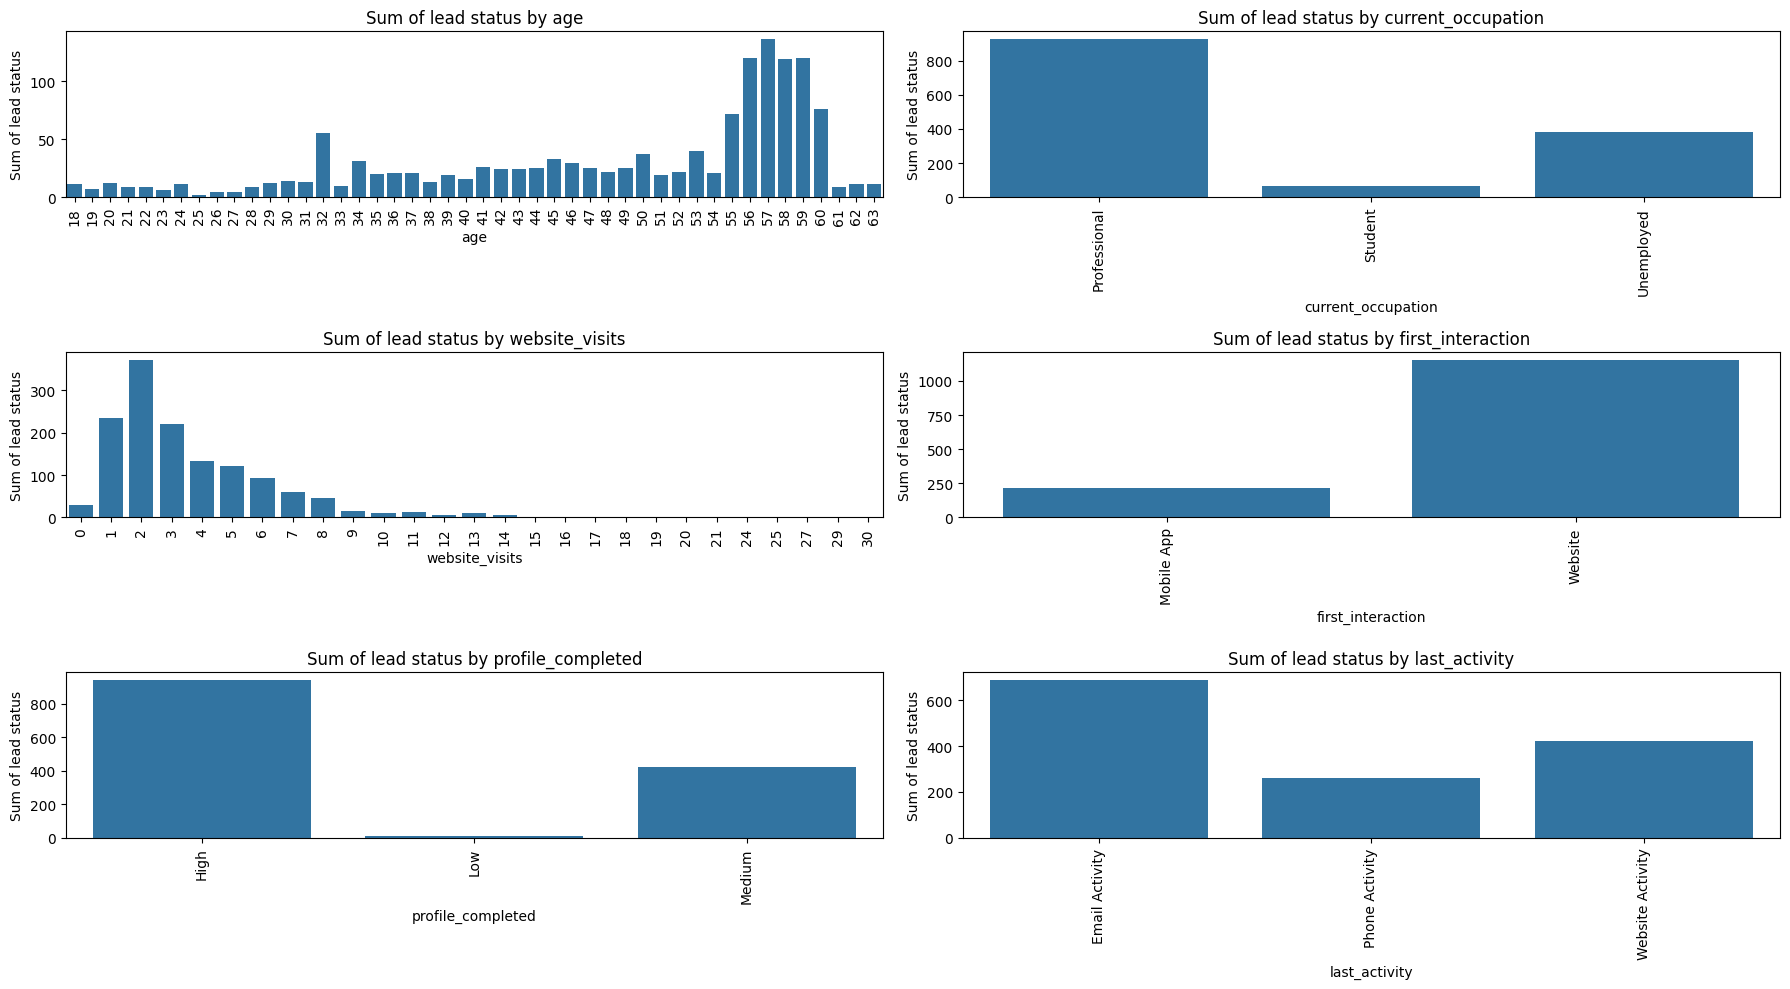

In [20]:
# List of variables to plot
variables = ['age', 'current_occupation', 'website_visits', 'first_interaction',
             'profile_completed', 'last_activity']

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
# fig.delaxes(axes[3, 2])  # Remove the extra subplot (12th)
axes = axes.flatten()  # Flatten the array for easier indexing

# Iterate through variables and create barplots
for i, var in enumerate(variables):
    # Calculate the sum of 'status' for each category of the variable
    var_sums = xlern.groupby(var)['status'].sum().reset_index()

    # Create the barplot
    sns.barplot(x=var, y='status', data=var_sums, ax=axes[i])
    axes[i].set_title(f'Sum of lead status by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sum of lead status')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Observations
1. Conversion rate is high among upper age bracket as there is a greater need for upskilling in this group
2. Conversion rate for Professionals is higher, most likely due to the cost of enrolling in the program
3. Conversion rate is high where first interaction is website most likely due to the fact that it is easier to complete a profile on website than a mobile app. It would be interesting to check the profile completion against first interaction
4. Conversion rate is high where last activity is email, since the confirmation of enrollment must be via email.

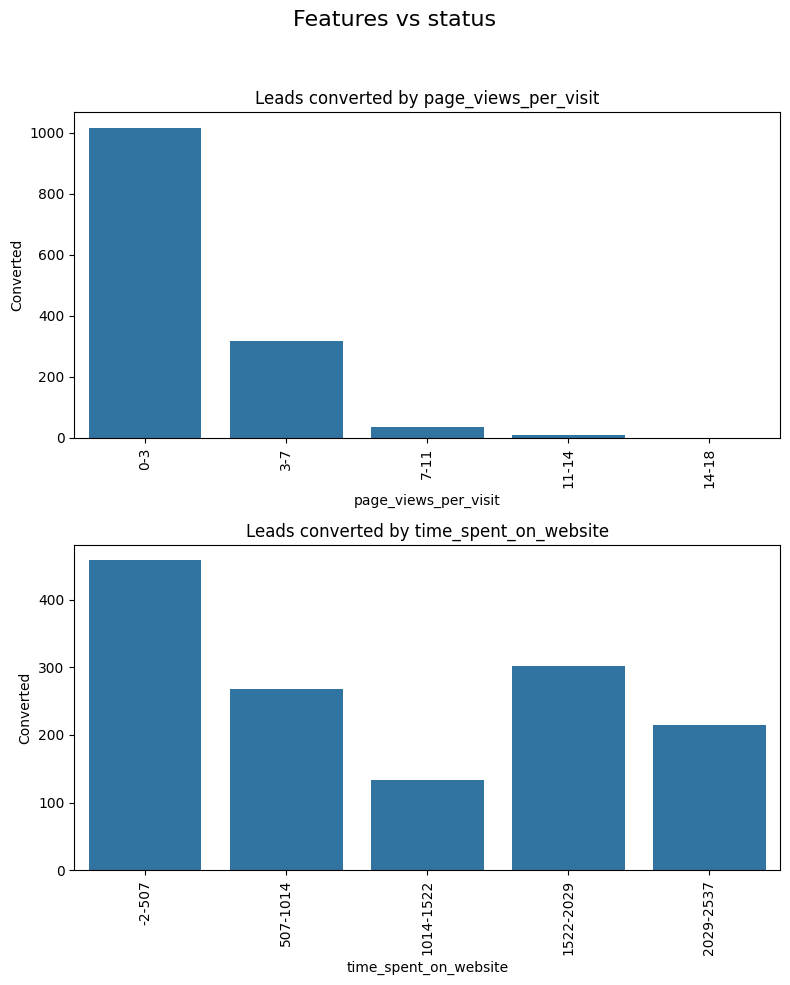

In [21]:
def plot_binned_features(data, features, status, bins=5, title=None):
    """
    Plots subplots for binned bar charts of multiple features against a status variable.

    Parameters:
        data (pd.DataFrame): The dataset containing the features and status.
        features (list): A list of continuous variables to be binned and plotted.
        status (str): The variable to sum for each bin, plotted on the y-axis.
        bins (int): Number of bins to create for the features.
        title (str, optional): Title of the overall plot. Default is None.

    Returns:
        None: Displays the subplots.
    """
    # Create a figure with subplots
    num_features = len(features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 5 * num_features))
    fig.suptitle(title if title else f"Features vs {status}", fontsize=16)

    # Ensure axes is iterable for a single feature
    if num_features == 1:
        axes = [axes]

    # Iterate over features and create plots
    for ax, feature in zip(axes, features):
        # Group by feature and calculate the sum of the status variable
        grouped_data = data.groupby(feature)[status].sum().reset_index()

        # Create bins for the feature
        grouped_data['feature_bin'] = pd.cut(grouped_data[feature], bins=bins)

        # Group by bins and calculate the sum of the status variable
        binned_data = grouped_data.groupby('feature_bin')[status].sum().reset_index()

        # Generate bin labels
        bin_edges = grouped_data['feature_bin'].cat.categories
        bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in bin_edges]

        # Bar plot
        sns.barplot(data=binned_data, x='feature_bin', y=status, ax=ax)

        # Add title and labels
        ax.set_title(f"Leads converted by {feature}")
        ax.set_xlabel(f"{feature}")
        ax.set_ylabel(f"Converted")

        # Set x-axis tick labels
        ax.set_xticks(range(len(bin_labels)))
        ax.set_xticklabels(bin_labels, rotation=90)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
# Call the function with a list of features
plot_binned_features(
    data=xlern,
    features=['page_views_per_visit', 'time_spent_on_website'],
    status='status',
    bins=5,
)

### Observations
1. In both of the above cases, high conversion rate may be driven by leads who have already made up their mind to enroll

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [22]:
# Check the proportion of conversion for weights in the models
xlern['status'].value_counts(normalize=True)

,proportion
status,
0,0.700957
1,0.299043


In [23]:
# Drop features with no significance
xlern.drop(['print_media_type1',
                'print_media_type2', 'digital_media', 'educational_channels'], axis=1, inplace=True)

In [24]:
# Creating dummy variables for the categorical columns
xlern = pd.get_dummies(
    xlern,
    columns = xlern.select_dtypes(include = ["object", "category"]).columns.tolist()
)

In [25]:
xlern.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity,referral_No,referral_Yes
0,57,7,1639,1.861,1,False,False,True,False,True,True,False,False,False,False,True,True,False
1,56,2,83,0.320,0,True,False,False,True,False,False,False,True,False,False,True,True,False
2,52,3,330,0.074,0,True,False,False,False,True,False,False,True,False,False,True,True,False
3,53,4,464,2.057,1,False,False,True,False,True,True,False,False,False,False,True,True,False
4,23,4,600,16.914,0,False,True,False,False,True,True,False,False,True,False,False,True,False


In [26]:
# Separating independent variables and the target variable
X = xlern.drop('status',axis=1)

Y = xlern['status']

In [27]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = 1)

In [28]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3218, 17)
Shape of test set :  (1380, 17)


In [29]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [30]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

* Predicting a lead will convert when it doesn't
* Predicting a lead will not convert when it does

**Which case is more important?**

* **Predicting that the lead will convert but doesn't**. ExtraaLearn wants to allocate resources efficiently to the most promising leads. In this case, a high precision is crucial. This means that when the model predicts a lead as likely to convert, it should be highly accurate. A high precision ensures that the sales team's efforts are focused on leads with a higher probability of conversion, maximizing their time and resources..

**How to reduce this loss i.e the need to reduce False Positives?**
* The company would want the Precision to be maximized

* The greater the Precision, the higher the chances of minimizing false positives. Hence, the focus should be on increasing the precision (minimizing the false positives) or, in other words, identifying the true negatives (i.e. Class 0) very well, so that the company can focus resources on coverting the leads.

* By optimizing for precision, ExtraaLearn can effectively allocate resources, improve sales efficiency, and ultimately drive business growth.

## Building a Decision Tree model

In [31]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

In [32]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2243
           1       1.00      1.00      1.00       975

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



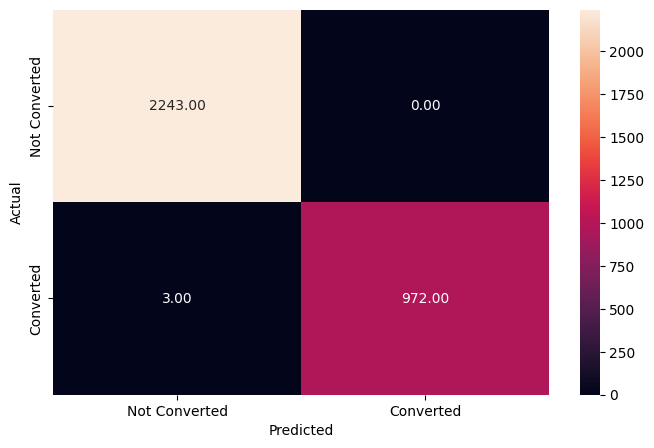

In [33]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

In [34]:
dtree_train = model_performance_classification(dt,x_train,y_train)
dtree_train

,Precision,Recall,Accuracy
0,0.999332,0.998462,0.999068


**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       980
           1       0.63      0.69      0.66       400

    accuracy                           0.79      1380
   macro avg       0.75      0.76      0.75      1380
weighted avg       0.80      0.79      0.79      1380



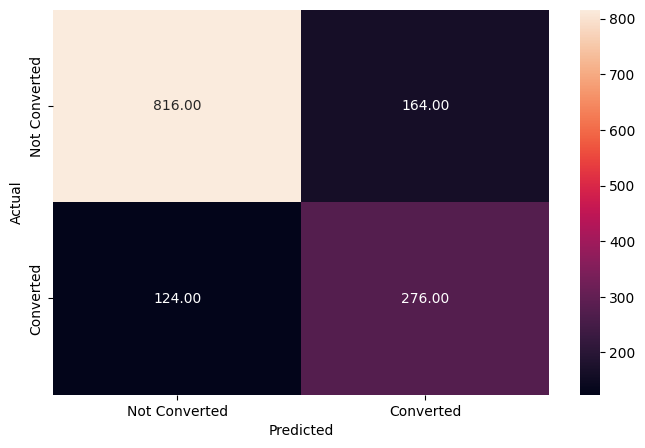

In [35]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [36]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.747679,0.761327,0.791304


Observations:
The Decision Tree works well on the training data but not so well on the test data as the precision is 0.63 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
Resource Allocation: Model flags 100 leads as "high potential," around 80 of them to actually convert. This helps ExtraaLearn focus their sales and marketing efforts on this group, increasing efficiency and potentially reducing costs.
It's important to remember that 37% of the leads identified by the model will not convert.

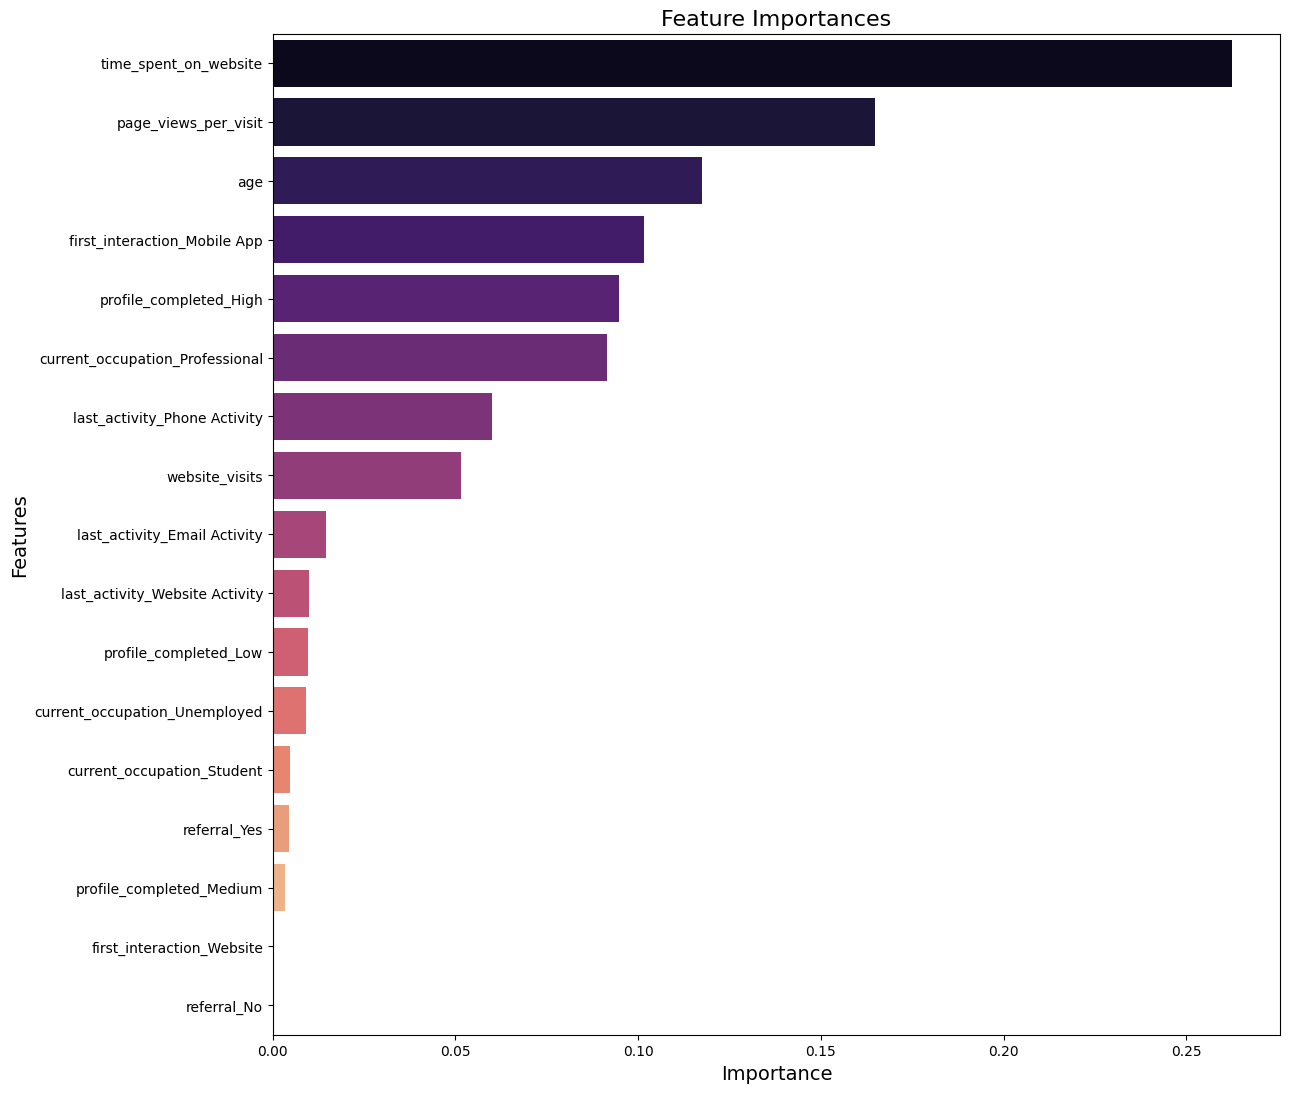

In [47]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(13, 13))

# Adding a color palette
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette="magma")  # You can use other palettes like "coolwarm", "magma", etc.

plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

### Fine tuning the decision tree using gridsearch

In [38]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 0.5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=10,
                       max_features='sqrt', min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2243
           1       0.93      0.62      0.74       975

    accuracy                           0.87      3218
   macro avg       0.89      0.80      0.83      3218
weighted avg       0.88      0.87      0.86      3218



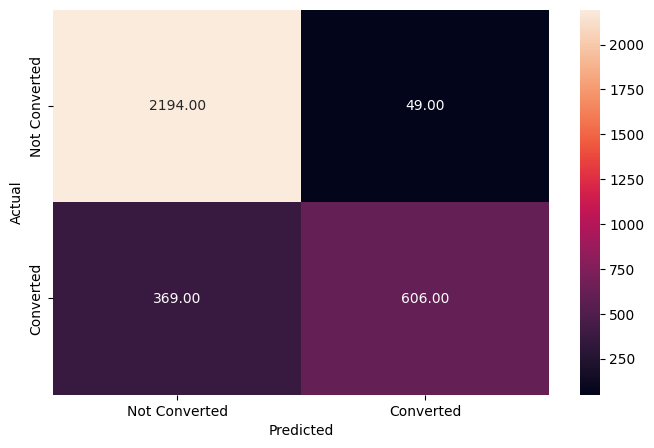

In [55]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       980
           1       0.81      0.54      0.65       400

    accuracy                           0.83      1380
   macro avg       0.82      0.74      0.77      1380
weighted avg       0.83      0.83      0.82      1380



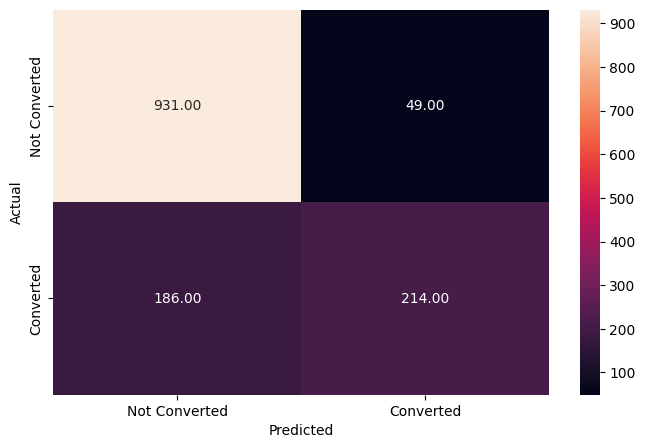

In [40]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [41]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.823585,0.7425,0.82971


**Observations:**

- The tuned model is performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data
- While this model is giving good results for precision, there is opportunity to improve the overall performance


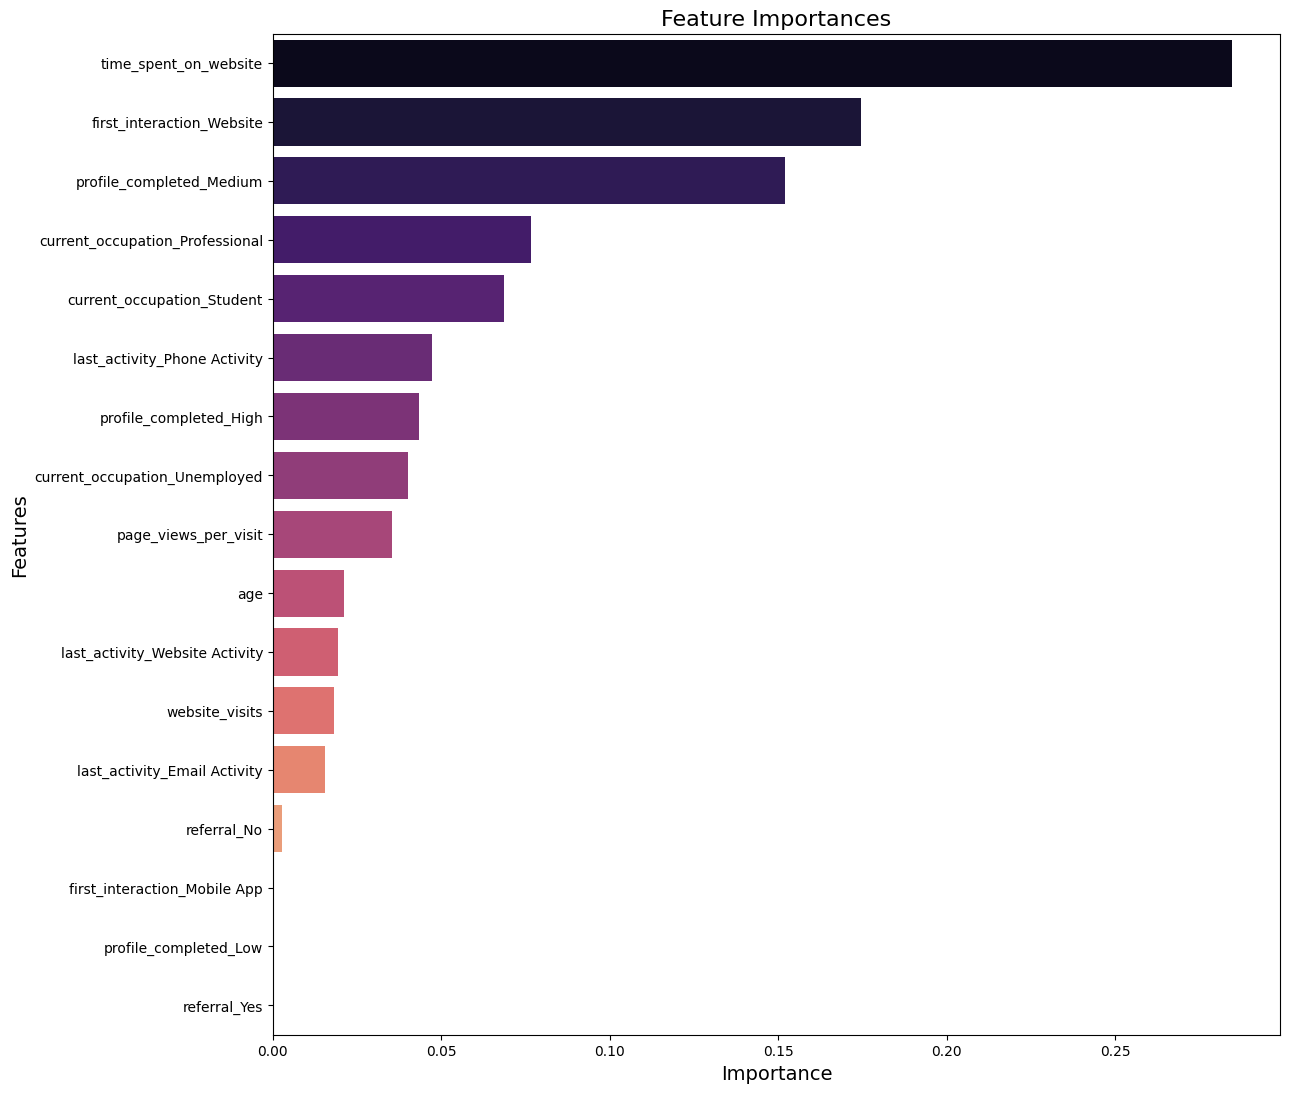

In [54]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(13, 13))

# Adding a color palette
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette="magma")  # You can use other palettes like "coolwarm", "magma", etc.

plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

## Building a Random Forest model

In [42]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2243
           1       1.00      1.00      1.00       975

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



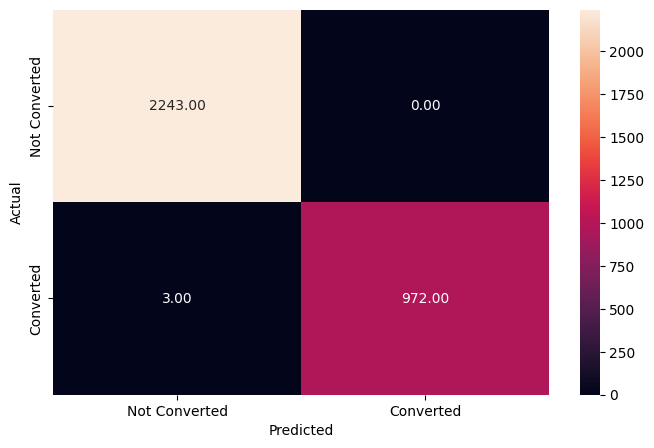

In [43]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       980
           1       0.74      0.71      0.73       400

    accuracy                           0.84      1380
   macro avg       0.81      0.81      0.81      1380
weighted avg       0.84      0.84      0.84      1380



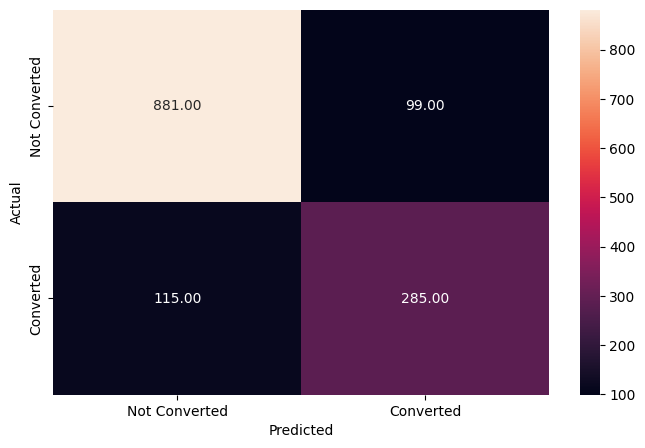

In [44]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [45]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.813363,0.80574,0.844928


Observations:
The random forest model is performing well overall in comparison with the previous models. While the precision has dipped sightly, the overall performance is better, as we are getting better recall and better f1 score
This model is overfitting the training data

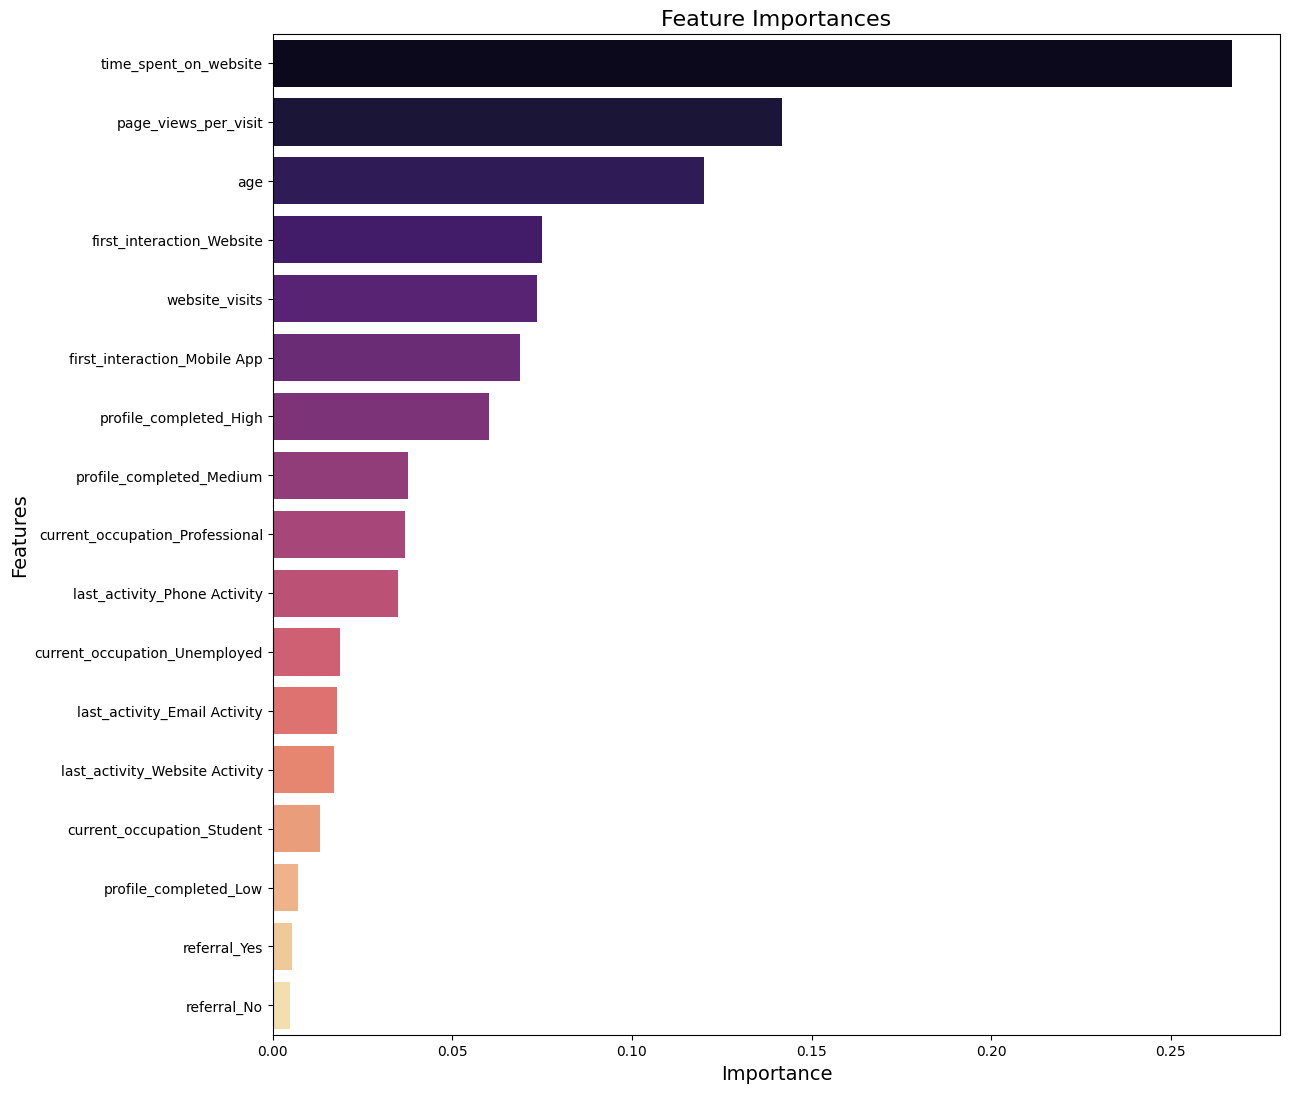

In [46]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

# Adding a color palette
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette="magma")  # You can use other palettes like "coolwarm", "magma", etc.

plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

## Model Performance evaluation and improvement

In [53]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

# Grid of parameters to choose from
params_rf = params_rf =   {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}
#  {
#     "n_estimators": [100, 250, 500],
#     "min_samples_leaf": np.arange(1, 4, 1),
#     "max_features": [0.7, 0.9, 'auto'],
# }



# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [56]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=10,
                       min_samples_split=10, n_estimators=200, random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2243
           1       0.92      0.73      0.82       975

    accuracy                           0.90      3218
   macro avg       0.91      0.85      0.87      3218
weighted avg       0.90      0.90      0.90      3218



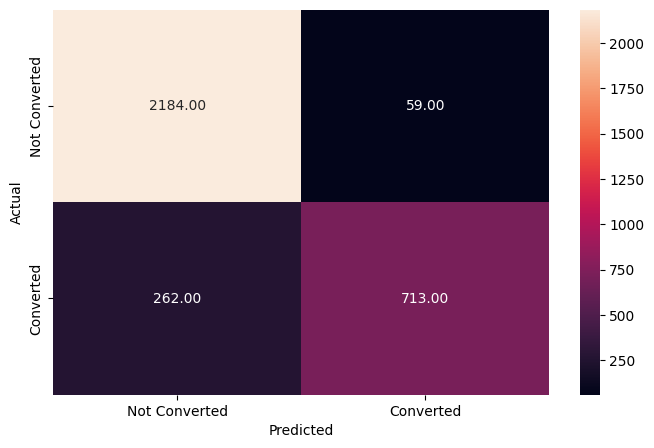

In [58]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       980
           1       0.80      0.64      0.71       400

    accuracy                           0.85      1380
   macro avg       0.83      0.78      0.80      1380
weighted avg       0.84      0.85      0.84      1380



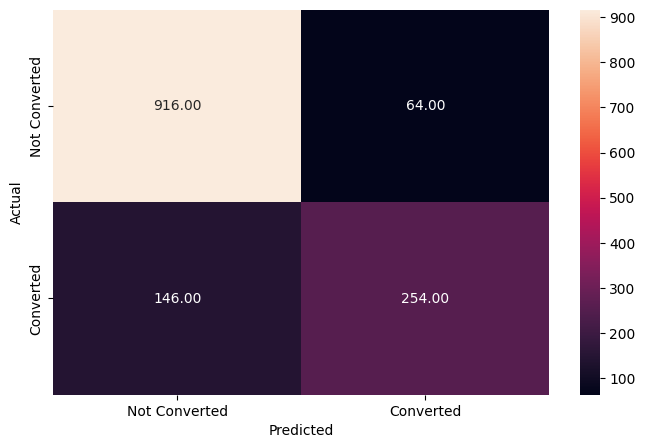

In [59]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [60]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.830633,0.784847,0.847826


Observations:
The tuned model shows a good performance on the test dataset for precision
The recall and f1 score have a small decrease which is expected as the model is optimized for precision.
This model is the best-performing one among all the models so far, and is giving us good precision  score on the test dataset.

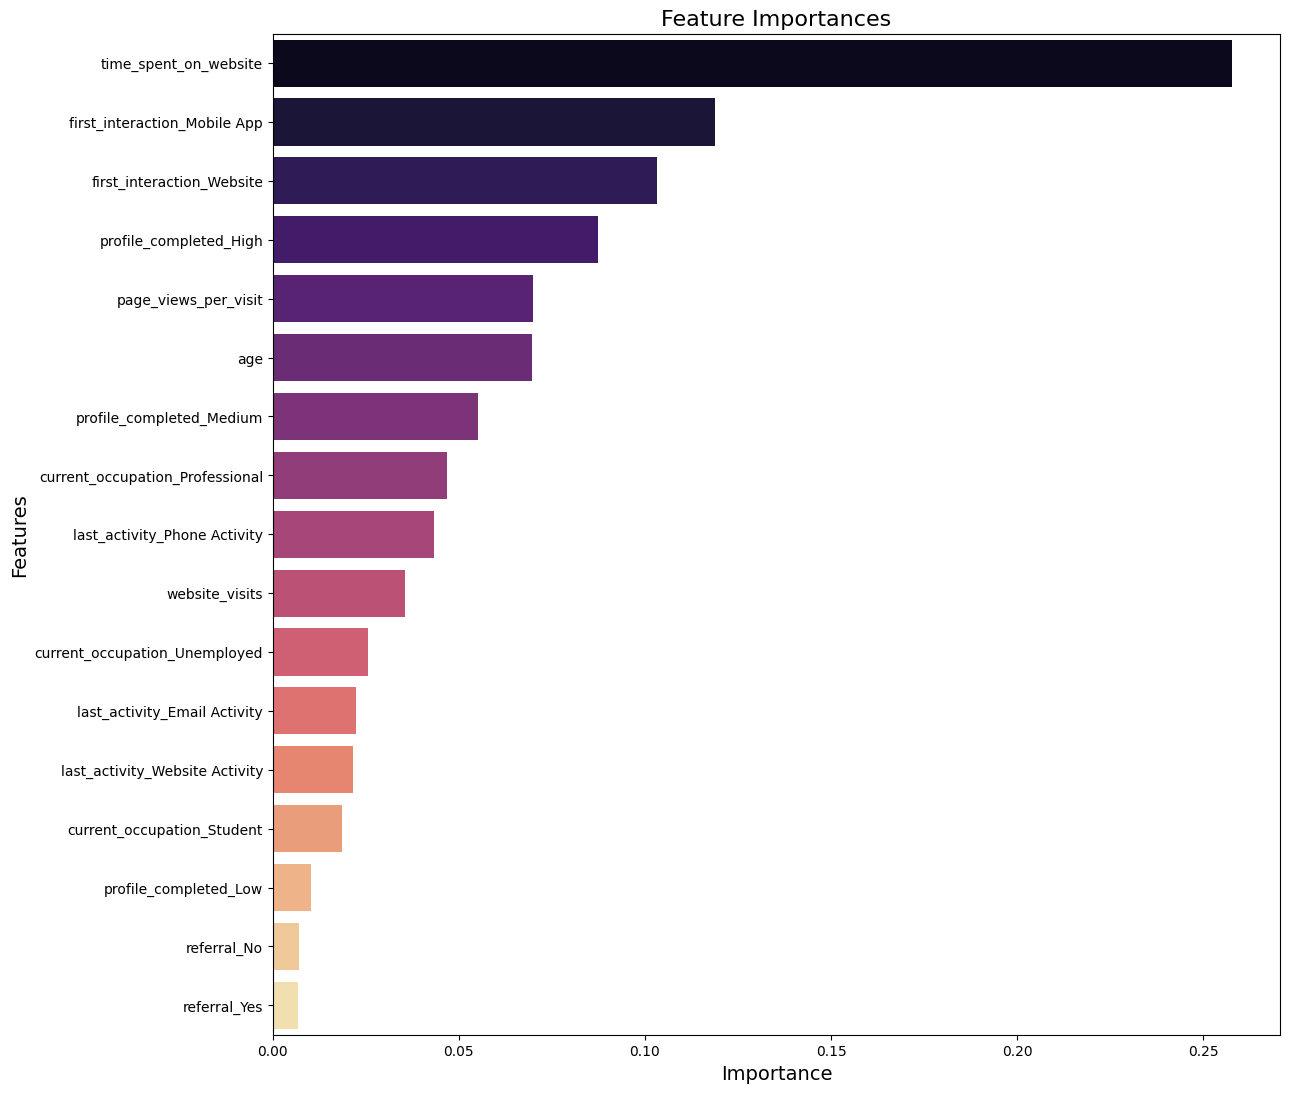

In [61]:
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

# Adding a color palette
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette="magma")  # You can use other palettes like "coolwarm", "magma", etc.

plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

### Observations
Overall time spent on the website is consistently the most inportant feature across all the models

## **Conclusion**

- The best model we have got so far is the tuned random forest model which is giving nearly ~ 80% precision for class 1 on the test data.
- The company should use this model to know which leads are not going to convert and focus the resources on those.
- Time spent on the website, first interaction via a digital platform, high profile complation and page views per visit seem to be the most important features.

## Actionable Insights and Recommendations

## **Recommendations**

- Since **time spent on the website** seems to be the single most important factor, ExtraaLearn should focus on driving traffic to the website. This can be done by ensuring higher search rating on popular search engines
- The above action will also aid the next 2 most important features, **first interaction via mobile app and website**
- None of the models have a satisfactory performance, indicating issues with underlying data. As was observed earlier, **ExtraaLearn should include the cost of enrollment, duration of the program** in the dataset for better prediction
- ExtraaLearn can also optimize the budget by **not spending on channels that have no significance for lead conversion such as print media**
- Age and Current occupation also indicate that cost is an important factor. Perhaps **discounts for certain age goups and unemployed leads** may help overall conversion rate
- ExtraaLearn should also **institute referal incentives**, as this is an area where the company is not doing well